In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from fastai import *
from fastai.vision import *

In [4]:
classes = ['daisy','dandelion','roses','sunflowers','tulips']

In [5]:
path = '/content/drive/My Drive/flower_photos/'

In [15]:
#bs => batch size
data = ImageDataBunch.from_folder(path=path,train='train',test='test',valid_pct=0.25,classes=classes
                                  ,ds_tfms=get_transforms(), size=224,num_workers=4,bs=64)


In [16]:
data = data.normalize(imagenet_stats)

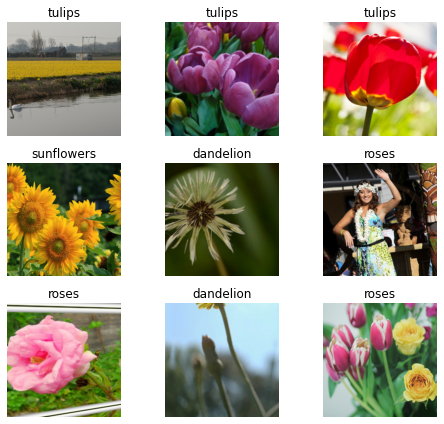

In [17]:
data.show_batch(rows=3,figsize=(7,6))

In [18]:
print(data.classes)
len(data.classes),data.c

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


(5, 5)

In [19]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.153924,0.365161,0.115090,05:20
1,0.680629,0.303225,0.092072,00:44
2,0.476598,0.275705,0.083120,00:43
3,0.354408,0.275781,0.083120,00:43


In [21]:
learn.save('stage_1')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idx = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idx)

True

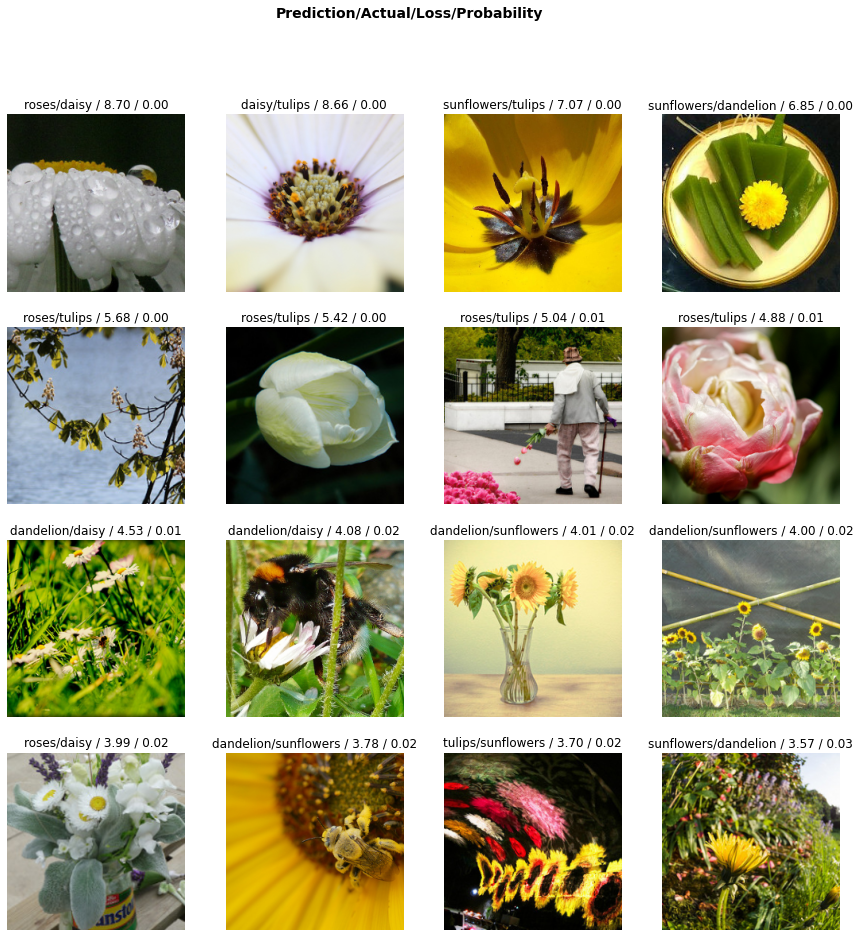

In [33]:
interp.plot_top_losses(16,figsize=(15,15))

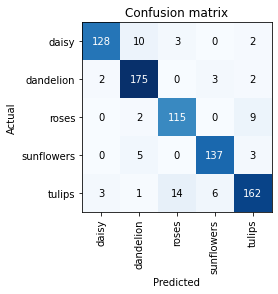

In [32]:
interp.plot_confusion_matrix()

In [34]:
interp.most_confused(min_val=2)

[('tulips', 'roses', 14),
 ('daisy', 'dandelion', 10),
 ('roses', 'tulips', 9),
 ('tulips', 'sunflowers', 6),
 ('sunflowers', 'dandelion', 5),
 ('daisy', 'roses', 3),
 ('dandelion', 'sunflowers', 3),
 ('sunflowers', 'tulips', 3),
 ('tulips', 'daisy', 3),
 ('daisy', 'tulips', 2),
 ('dandelion', 'daisy', 2),
 ('dandelion', 'tulips', 2),
 ('roses', 'dandelion', 2)]

In [36]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.410893,0.385572,0.097187,00:44


In [38]:
learn.load('stage_1');

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


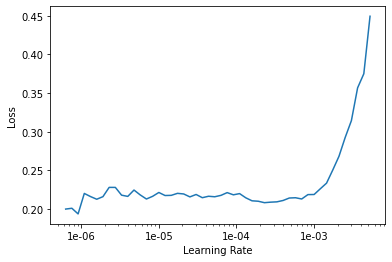

In [40]:
learn.recorder.plot()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.223967,0.258677,0.075448,00:44
1,0.206502,0.253026,0.076726,00:45


In [ ]:
learn.recorder.plot_losses()